In [2]:
import numpy as np

In [5]:
np.random.normal(0,1)

0.2500150792733339

In [8]:
%%time
length = 10000000
res=[]
for i in range(length):
    res.append(np.random.normal(0,1))

Wall time: 2min 14s


In [9]:
res[-5:]

[-1.3891222121169493,
 -0.40177832420301895,
 -1.2546465673394311,
 -0.10268631912066457,
 0.5788151282902776]

In [10]:
len(res)

10000000

In [11]:
%%time
print('\nTime to create long random list using numpy function')
np_list = np.random.normal(0,1,length)

/nTime to create long random list using numpy function
Wall time: 1.08 s


In [12]:
len(np_list)

10000000

In [13]:
type(np_list)

numpy.ndarray

In [14]:
np_list[-5:]

array([-1.44502964,  1.09546532,  0.04684153,  0.52636896,  0.98910547])

In [15]:
np_list[0:10]

array([ 0.0548189 , -0.72996561, -0.33956518, -0.74399682,  0.08115997,
        0.05299527,  0.73989138,  0.52423546, -0.97638172, -0.10464321])

In [16]:
print ('\nTime to add one number to every element of a long random list, list comprehension')
%time add_list = [i + 4 for i in res]

print('\nTime to add one number to every element of long random list, using numpy')
%time np_add_list = 4 + np_list



Time to add one number to every element of a long random list, list comprehension
Wall time: 2.96 s

Time to add one number to every element of long random list, using numpy
Wall time: 116 ms


In [17]:
print ('\nTime to multiply one number to every element of a long random list, list comprehension')
%time add_list = [i * 4 for i in res]

print('\nTime to multiply one number to every element of long random list, using numpy')
%time np_add_list = 4 * np_list


Time to multiply one number to every element of a long random list, list comprehension
Wall time: 2.92 s

Time to multiply one number to every element of long random list, using numpy
Wall time: 76.9 ms


### Add List

In [18]:
long_random_list = [np.random.normal(0,1) for i in range(length)]
np_list_dp = np_list.copy()

In [20]:
print('\nTime to add two list using list comprehension')
%time a = [res[i] + long_random_list[i] for i in range(length)]

print('\nTime to add two list using numpy')
%time np_list_dp + np_list

print('Done')


Time to add two list using list comprehension
Wall time: 4.45 s

Time to add two list using numpy
Wall time: 66.7 ms
Done


### Better than List

In [36]:
threshold = 5

%time print('Find elements above a given threshold in List', [ i for i in range(length) if long_random_list[i] > threshold])
%time print('Find elements above a given threshold in Numpy Array', np.where(np_list_dp > threshold))

Find elements above a given threshold in List [452703, 9672024]
Wall time: 6.88 s
Find elements above a given threshold in Numpy Array (array([7713156], dtype=int64),)
Wall time: 96.1 ms


In [22]:
import sys

In [27]:
from platform import python_version

print(python_version())

3.8.5


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

datafile = 'trees.txt'

'head' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
girths=[]
heights=[]
volumes=[]

with open(datafile, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    
    for row in reader:
        girths.append(eval(row['Girth']))
        heights.append(eval(row['Height']))
        volumes.append(eval(row['Volume']))

In [45]:
print('Girths', girths[0:10])
print('Heights', heights[0:10])
print('Volumes', volumes[0:10])

Girths [8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11, 11, 11.1, 11.2]
Heights [70, 65, 63, 72, 81, 83, 66, 75, 80, 75]
Volumes [10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9]


In [46]:
len(heights)

10

In [49]:
print('Mean of Girths is ', np.mean(girths))
print('Median of Girths is ', np.median(girths))
print('Standard Deviation of Girths is ', np.std(girths))
print('25th Percentile of Girths is ', np.percentile(girths, 25))

from scipy import stats
print('10 is at the following percentile in Girths: ', stats.percentileofscore(girths, 10))

Mean of Girths is  10.2
Median of Girths is  10.75
Standard Deviation of Girths is  1.0917875251164941
25th Percentile of Girths is  9.225000000000001
10 is at the following percentile in Girths:  30.0


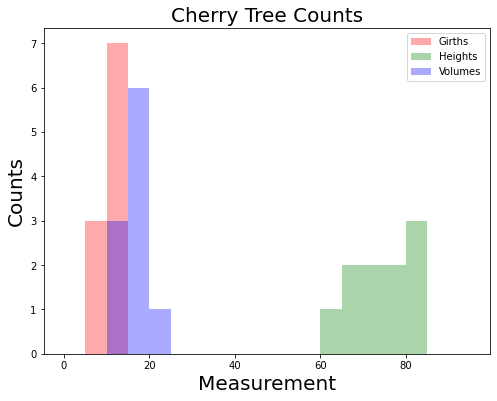

In [51]:
%matplotlib inline

bins = range(0,100,5)
plt.figure(figsize=(8,6))

plt.hist(girths, bins=bins, color='red', alpha=1.0/3, label='Girths')
plt.hist(heights, bins=bins, color='green', alpha=1.0/3, label='Heights')
plt.hist(volumes, bins=bins, color='blue', alpha=1.0/3, label='Volumes')

plt.legend()
plt.title('Cherry Tree Counts', fontsize=20)
plt.xlabel('Measurement', fontsize=20)
plt.ylabel('Counts', fontsize=20)

plt.show()

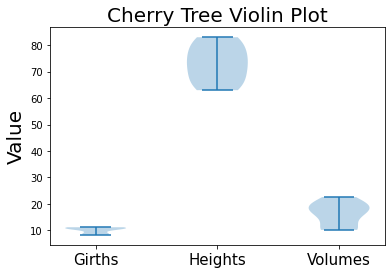

In [53]:
pos = [1,2,3]
data = [girths, heights, volumes]
plt.figure()
plt.violinplot(data, pos, widths=0.5)

my_xticks = ['Girths','Heights','Volumes']
plt.xticks(pos, my_xticks, fontsize=15)
plt.title('Cherry Tree Violin Plot', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.show()

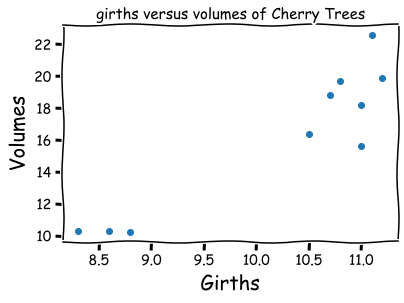

In [56]:
plt.figure()
plt.xkcd()
plt.scatter(girths, volumes)
plt.xlabel('Girths', fontsize=20)
plt.ylabel('Volumes', fontsize=20)
plt.title('girths versus volumes of Cherry Trees', fontsize=15)
plt.show()

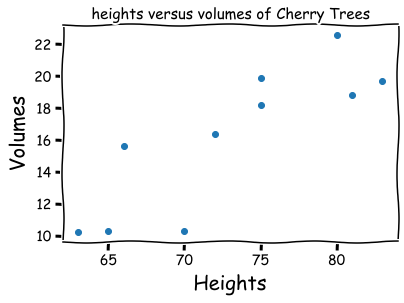

In [57]:
plt.figure()
plt.xkcd()
plt.scatter(heights, volumes)
plt.xlabel('Heights', fontsize=20)
plt.ylabel('Volumes', fontsize=20)
plt.title('heights versus volumes of Cherry Trees', fontsize=15)
plt.show()

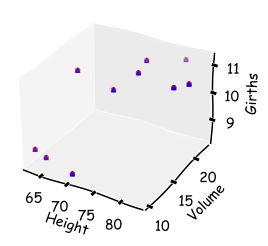

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n=100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23,32], y in [0,100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = heights
    ys = volumes
    zs = girths
    ax.scatter(xs, ys, zs, c=c, marker=m)
    
ax.set_xlabel('Height')
ax.set_ylabel('Volume')
ax.set_zlabel('Girths')

plt.show()


In [59]:
print('Correlation matrix is ', np.corrcoef(heights, volumes)[0][1])
print('Correlation Coefficient is ', np.corrcoef(girths, volumes)[0][1])

Correlation matrix is  0.8435568950112431
Correlation Coefficient is  0.9208893088719988


Best fir line: y =  3.614932885906042 x -20.67231543624163 , r = 0.9208893088719988


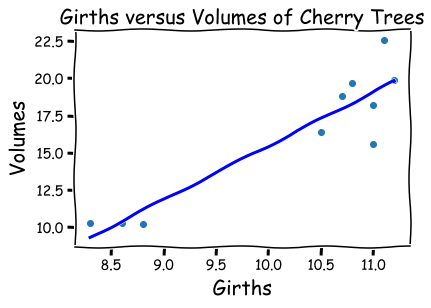

In [61]:
from scipy.stats import linregress

slope, intercept, r, p, stderr = linregress(girths, volumes)

print('Best fir line: y = ', slope, 'x', intercept, ', r =',r)

xvalues = np.linspace(min(girths), max(girths), 200)

yvalues = slope * xvalues + intercept

plt.figure()
plt.plot(xvalues, yvalues, linewidth=3.0, color='blue', linestyle='solid')
plt.scatter(girths, volumes)
plt.xlabel('Girths', fontsize=20)
plt.ylabel('Volumes', fontsize=20)
plt.title('Girths versus Volumes of Cherry Trees', fontsize=20)
plt.show()

##### Linear Regression looks good. but what if we try to fit a Curve ?

In [63]:
from scipy.optimize import curve_fit

def quadratic(x,a,b,c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(quadratic, girths, volumes)
print('Fitted quadratic is', popt[0], 'x^2 +', popt[1], 'x', '+', popt[2])

Fitted quadratic is 0.7114896408550448 x^2 + -10.26806841582379 x + 46.06281995492209


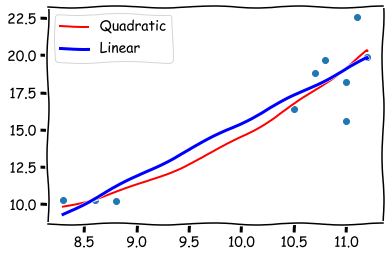

In [64]:
yvalues_quad = [quadratic(x, popt[0], popt[1], popt[2]) for x in xvalues]
plt.plot(xvalues, yvalues_quad, color='red', linestyle='-', label='Quadratic')
plt.plot(xvalues, yvalues, linewidth=3.0, color='blue', linestyle='solid', label='Linear')
plt.scatter(girths, volumes)
plt.legend(loc='best') # Automatically finds the best location for Legend
plt.show()

### Other Practice problems using Numpy

##### Masking

In [79]:
import numpy as np
names = np.array(['Bob', 'Jon', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Jon', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [66]:
names == 'Joe'

array([False, False, False, False, False,  True,  True])

In [70]:
colors = np.array(['Green','Yellow','Blue'])

In [71]:
colors == 'Blue'

array([False, False,  True])

In [72]:
col_vector = np.eye(3)
col_vector

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [73]:
col_vector[colors == 'Blue']

array([[0., 0., 1.]])

In [76]:
dataNames = np.random.randn(7,4)
dataNames.dtype

dtype('float64')

In [77]:
dataNames

array([[ 0.13989399, -1.12615314,  1.18507739, -0.624584  ],
       [-0.54784385, -0.0384514 ,  1.24632941, -0.60832282],
       [-0.90337693,  0.47268831,  0.69927846, -0.77681752],
       [-0.96195894, -1.3160899 , -0.22922614, -0.12506074],
       [ 0.43759089,  0.73727281, -0.12454194,  1.76374596],
       [ 0.20233219, -0.4709248 ,  0.82752597, -1.58251957],
       [ 0.75670618,  0.06632621,  2.03401912,  0.9949774 ]])

In [81]:
dataNames[names == 'Joe']

array([[ 0.20233219, -0.4709248 ,  0.82752597, -1.58251957],
       [ 0.75670618,  0.06632621,  2.03401912,  0.9949774 ]])

In [85]:
dataNames > 0

array([[ True, False,  True, False],
       [False, False,  True, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True, False,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True]])

In [86]:
dataNames[dataNames > 0]

array([0.13989399, 1.18507739, 1.24632941, 0.47268831, 0.69927846,
       0.43759089, 0.73727281, 1.76374596, 0.20233219, 0.82752597,
       0.75670618, 0.06632621, 2.03401912, 0.9949774 ])

In [89]:
dataNames[names == 'Bob', 2:]

array([[ 1.18507739, -0.624584  ],
       [-0.22922614, -0.12506074]])

In [90]:
dataNames[names == 'Bob', 2]

array([ 1.18507739, -0.22922614])

In [91]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [92]:
dataNames[dataNames < 0] = 0

In [93]:
dataNames

array([[0.13989399, 0.        , 1.18507739, 0.        ],
       [0.        , 0.        , 1.24632941, 0.        ],
       [0.        , 0.47268831, 0.69927846, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43759089, 0.73727281, 0.        , 1.76374596],
       [0.20233219, 0.        , 0.82752597, 0.        ],
       [0.75670618, 0.06632621, 2.03401912, 0.9949774 ]])

In [94]:
my_fil = dataNames>0

In [95]:
my_fil

array([[ True, False,  True, False],
       [False, False,  True, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [ True,  True, False,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True]])

In [96]:
dataNames[my_fil]

array([0.13989399, 1.18507739, 1.24632941, 0.47268831, 0.69927846,
       0.43759089, 0.73727281, 1.76374596, 0.20233219, 0.82752597,
       0.75670618, 0.06632621, 2.03401912, 0.9949774 ])

In [98]:
mask = (names =='Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [99]:
dataNames[mask]

array([[0.13989399, 0.        , 1.18507739, 0.        ],
       [0.        , 0.47268831, 0.69927846, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.43759089, 0.73727281, 0.        , 1.76374596]])

##### Simple Matrix Operations

In [101]:
dataMat = np.arange(15)
dataMat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [102]:
dataMat = dataMat.reshape((3,5))
dataMat

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [103]:
dataMat.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [104]:
np.dot(dataMat, dataMat.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

### Numpy application

<class 'numpy.ndarray'>
float32
(251, 201, 4)


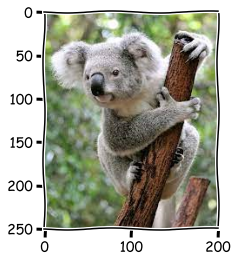

In [111]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot
#load image as pixel array
image = image.imread('koala.png')
print(type(image))
#summarize shape of pixel array
print(image.dtype)
print(image.shape)
#display array of pixel as an image
pyplot.imshow(image)
pyplot.show()

In [107]:
type(image)

numpy.ndarray

##### Extract every pixel from the image in Numpy array

In [110]:
from PIL import Image
from numpy import asarray
#load the image
image = Image.open('koala.png')
data = asarray(image)
print(type(data))
#summarize shape
print(data.shape)

#create pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(251, 201, 4)
<class 'PIL.Image.Image'>
RGBA
(201, 251)


In [112]:
print(data)

[[[107 133  88 255]
  [114 140  95 255]
  [113 140  97 255]
  ...
  [184 182 161 255]
  [189 186 167 255]
  [185 182 165 255]]

 [[ 93 118  76 255]
  [104 129  87 255]
  [110 135  95 255]
  ...
  [174 172 149 255]
  [180 178 157 255]
  [179 176 157 255]]

 [[ 79 101  62 255]
  [ 93 118  78 255]
  [106 131  92 255]
  ...
  [170 170 142 255]
  [175 175 149 255]
  [178 178 154 255]]

 ...

 [[ 72  90  52 255]
  [ 76  94  56 255]
  [ 81  99  61 255]
  ...
  [124 143 124 255]
  [106 125 106 255]
  [ 96 115  96 255]]

 [[ 79  97  59 255]
  [ 82 100  62 255]
  [ 87 105  67 255]
  ...
  [117 136 117 255]
  [ 98 117  98 255]
  [ 96 115  96 255]]

 [[ 86 104  66 255]
  [ 90 108  70 255]
  [ 95 113  75 255]
  ...
  [110 127 111 255]
  [ 91 108  92 255]
  [ 97 114  98 255]]]


In [113]:
data.shape

(251, 201, 4)